In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv(r"D:\Data Analysis Projects\Dynamic Pricing Strategy using Python\dynamic_pricing.csv")
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
print(data.describe())

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

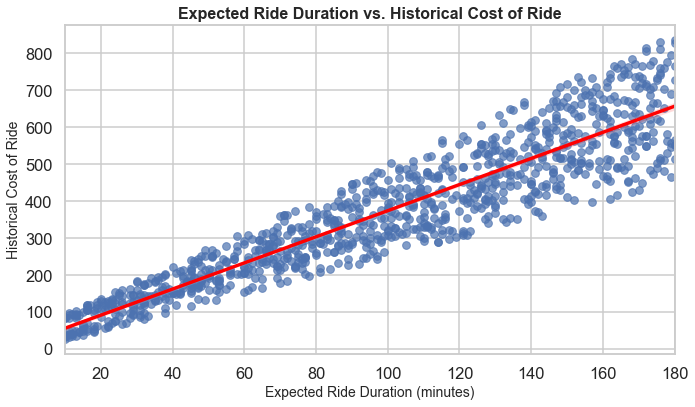

In [4]:
sns.set(style="whitegrid", context="talk", palette="deep")
plt.figure(figsize=(10, 6))
sns.regplot(data=data,x='Expected_Ride_Duration',y='Historical_Cost_of_Ride',scatter_kws={'s': 60, 'alpha': 0.7},line_kws={'color': 'red'})
plt.title('Expected Ride Duration vs. Historical Cost of Ride', fontsize=16, fontweight='bold')
plt.xlabel('Expected Ride Duration (minutes)', fontsize=14)
plt.ylabel('Historical Cost of Ride', fontsize=14)
plt.tight_layout()
plt.show()

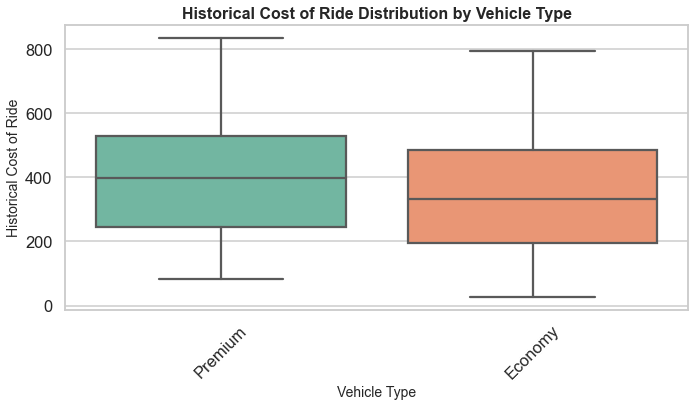

In [5]:
sns.set(style="whitegrid", context="talk", palette="muted")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x='Vehicle_Type',y='Historical_Cost_of_Ride', palette='Set2')
plt.title('Historical Cost of Ride Distribution by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Historical Cost of Ride', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

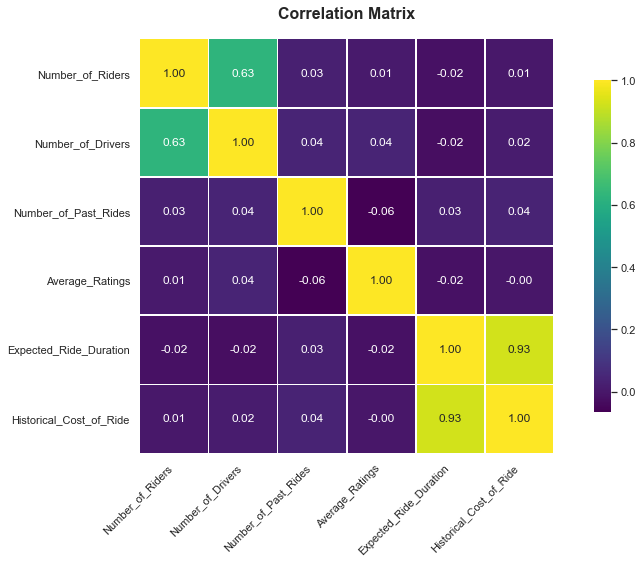

In [6]:
corr_matrix = data.corr()
sns.set(style="white", context="notebook")
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="viridis",linewidths=0.5,square=True,cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Implementing a Dynamic Pricing Strategy

In [7]:
# Calculate demand_multiplier based on demand levels
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on number of drivers
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(data['Number_of_Drivers'], high_supply_percentile) / data['Number_of_Drivers'],
                                     np.percentile(data['Number_of_Drivers'], low_supply_percentile) / data['Number_of_Drivers'])

# Set thresholds for when multipliers start to affect price
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

#Calculate the new price using demand and supply logic

data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (np.maximum(data['demand_multiplier'], demand_threshold_low)
                                                             * np.maximum(data['supply_multiplier'], supply_threshold_high)
)

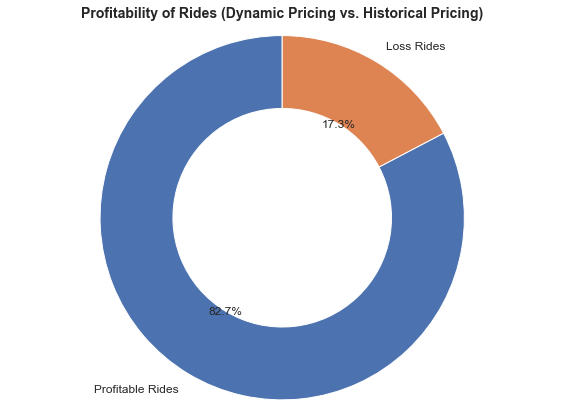

In [8]:
#Calculate profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100

#Filter profitable and loss rides
profitable_rides = data[data['profit_percentage'] > 0]
loss_rides = data[data['profit_percentage'] < 0]

#Count the number of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

#Visualizing it using a donut chart
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90,wedgeprops={'width': 0.4},textprops={'fontsize': 12})
plt.title('Profitability of Rides (Dynamic Pricing vs. Historical Pricing)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

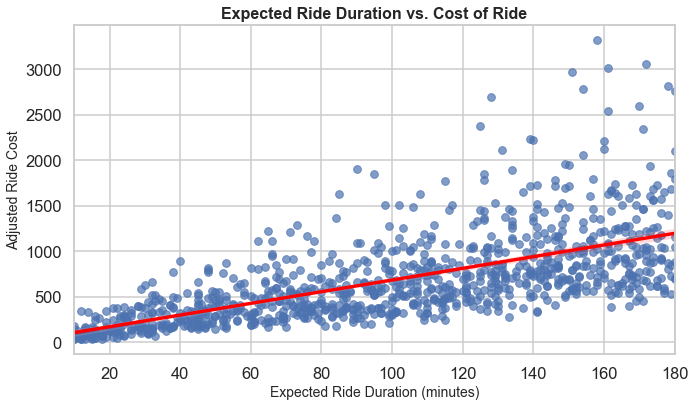

In [9]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.regplot(data=data,x='Expected_Ride_Duration',y='adjusted_ride_cost',scatter_kws={'s': 60, 'alpha': 0.7},line_kws={'color': 'red'})

plt.title('Expected Ride Duration vs. Cost of Ride', fontsize=16, fontweight='bold')
plt.xlabel('Expected Ride Duration (minutes)', fontsize=14)
plt.ylabel('Adjusted Ride Cost', fontsize=14)

plt.tight_layout()
plt.show()

In [10]:
def data_preprocessing_pipeline(data):
    #Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns
    
    #Fills any missing numeric values with the mean of that column
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())
    
    #Handle Outliers in Numeric Features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])
    #Fills missing values in categorical columns with the most frequent value (mode) in that column.
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])
    
    return data

In [11]:
data["Vehicle_Type"] = data["Vehicle_Type"].map({"Premium": 1,"Economy": 0})

In [12]:
from sklearn.model_selection import train_test_split

#Selecting features x and y
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

#Splitting Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Flattening the Target Arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

#Training the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
#This function converts the vehicle type string to a number
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric

#Predicting the price
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

#User input and error handling
try:
    user_number_of_riders = float(input("Number of riders: "))
    user_number_of_drivers = float(input("Number of drivers: "))
    user_vehicle_type = input("Type of vehicle: ")
    expected_ride_duration = float(input("Expected ride duration: "))
    predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, expected_ride_duration)
    print("predicted dynamic ride cost:", predicted_price)
except Exception as e:
    print("⚠️ Invalid input.")

Number of riders: 55
Number of drivers: 25
Type of vehicle: Premium
Expected ride duration: 35
predicted dynamic ride cost: [384.63335979]


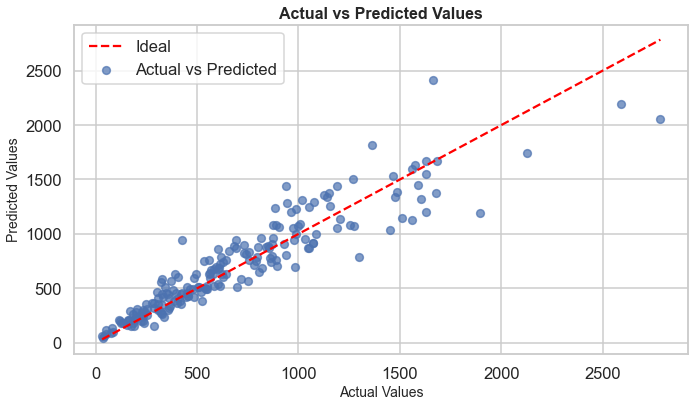

In [14]:
#Predict on the test set
y_pred = model.predict(x_test)

#Flatten y_test if it's in 2D
y_test_flat = y_test.flatten()

#Set the plot style
sns.set(style="whitegrid", context="talk")

#Create the figure and scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, y_pred, alpha=0.7, label='Actual vs Predicted', s=60)

#Draws the prediction line
min_val = min(min(y_test_flat), min(y_pred))
max_val = max(max(y_test_flat), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal')

#add titles and labels
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend()
#shows the plot
plt.tight_layout()
plt.show()
